In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as s
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
insta=pd.read_excel("Influencer.xlsx")
insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [49]:
insta.tail()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil
199,200,\nnancyajram,81,33.4m,382.5k,3.8k,0.004,128.2k,1.5b,France


In [50]:
insta.shape

(200, 10)

In [51]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [52]:
insta.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [53]:
insta["Country Or Region"].fillna("Other",inplace=True)

In [54]:
insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,Other
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


# Data cleaning

## Rank feature

In [55]:
insta["Rank"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Channel info feature

In [56]:
insta["Channel Info"]=insta["Channel Info"].astype("str")

insta["Channel Info"]=insta["Channel Info"].apply(lambda x: x.strip("\n"))

insta["Channel Info"]=insta["Channel Info"].apply(lambda x: x.capitalize())

insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,Leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,Other
3,4,Selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,Therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


## For visualization on data we take a copy of the data

In [57]:
instagram_data=insta.copy()

## Follower feature

In [58]:
millon_follower=insta[insta["Followers"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Followers"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Followers"].apply(lambda x: x[-1] in "0123456789")]

In [59]:
def billon(x):
    a=x.strip("b")
    b=pd.to_numeric(a)
    b=b*1000000000
    return b

In [60]:
def millon(x):
    a=x.strip("m")
    b=pd.to_numeric(a)
    b=b*1000000
    return b

In [61]:
def k(x):
    a=x.strip("k")
    b=pd.to_numeric(a)
    b=b*1000
    return b

In [62]:
millon_follower["Followers"]=millon_follower["Followers"].apply(millon)

k_follower["Followers"]=k_follower["Followers"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485200000.0,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,Leomessi,90,363900000.0,6.7m,915,0.010,3.5m,6.1b,Other
3,4,Selenagomez,93,348800000.0,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,Therock,91,339400000.0,1.8m,6.8k,0.003,932.0k,12.6b,United States


## Average likes feature

In [63]:
millon_follower=insta[insta["Avg. Likes"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Avg. Likes"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Avg. Likes"].apply(lambda x: x[-1] in "0123456789")]

In [64]:
millon_follower["Avg. Likes"]=millon_follower["Avg. Likes"].apply(millon)

k_follower["Avg. Likes"]=k_follower["Avg. Likes"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485200000.0,8700000.0,3.4k,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7.0k,0.014,5.0m,57.4b,United States
2,3,Leomessi,90,363900000.0,6700000.0,915,0.010,3.5m,6.1b,Other
3,4,Selenagomez,93,348800000.0,6100000.0,1.9k,0.005,1.7m,11.4b,United States
4,5,Therock,91,339400000.0,1800000.0,6.8k,0.003,932.0k,12.6b,United States


## Posts feature

In [65]:
insta["Posts"]=insta["Posts"].astype("str")

millon_follower=insta[insta["Posts"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Posts"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Posts"].apply(lambda x: x[-1] in "0123456789")]

In [66]:
millon_follower["Posts"]=millon_follower["Posts"].apply(millon)

k_follower["Posts"]=k_follower["Posts"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5.0m,57.4b,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1.7m,11.4b,United States
4,5,Therock,91,339400000.0,1800000.0,6800.0,0.003,932.0k,12.6b,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3.1m,18.5b,United States
...,...,...,...,...,...,...,...,...,...,...
171,172,Eminem,84,36600000.0,988400.0,691,0.011,382.5k,683.0m,United States
174,175,Nattinatasha,47,36100000.0,513200.0,59,0.006,201.6k,30.3m,Czech Republic
181,182,Toni.krs,83,35600000.0,597800.0,946,0.012,432.5k,565.5m,Other
189,190,Adidasoriginals,83,34100000.0,136200.0,180,0.002,66.8k,24.5m,Other


## New post like feature

In [67]:
insta["New Post Avg. Likes"]=insta["New Post Avg. Likes"].astype("str")

millon_follower=insta[insta["New Post Avg. Likes"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["New Post Avg. Likes"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["New Post Avg. Likes"].apply(lambda x: x[-1] in "0123456789")]

In [68]:
millon_follower["New Post Avg. Likes"]=millon_follower["New Post Avg. Likes"].apply(millon)

k_follower["New Post Avg. Likes"]=k_follower["New Post Avg. Likes"].apply(k)

insta= pd.concat([millon_follower,k_follower,num_follower],axis=0)

insta

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,29.1b,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,57.4b,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,11.4b,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,18.5b,United States
6,7,Kimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,19.8b,United States
...,...,...,...,...,...,...,...,...,...,...
174,175,Nattinatasha,47,36100000.0,513200.0,59,0.006,201600.0,30.3m,Czech Republic
181,182,Toni.krs,83,35600000.0,597800.0,946,0.012,432500.0,565.5m,Other
189,190,Adidasoriginals,83,34100000.0,136200.0,180,0.002,66800.0,24.5m,Other
198,199,Luansantana,79,33500000.0,193300.0,865,0.003,82600.0,167.2m,Brazil


In [69]:
insta["Total Likes"]=insta["Total Likes"].astype("str")

billon_follower=insta[insta["Total Likes"].apply(lambda x: x[-1]=="b")]

millon_follower=insta[insta["Total Likes"].apply(lambda x: x[-1]=="m")]

k_follower=insta[insta["Total Likes"].apply(lambda x: x[-1]=="k")]

num_follower=insta[insta["Total Likes"].apply(lambda x: x[-1] in "0123456789")]

In [70]:
millon_follower["Total Likes"]=millon_follower["Total Likes"].apply(millon)

billon_follower["Total Likes"]=billon_follower["Total Likes"].apply(billon)

k_follower["Total Likes"]=k_follower["Total Likes"].apply(k)

insta= pd.concat([billon_follower,millon_follower,k_follower,num_follower],axis=0)

insta

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,1.850000e+10,United States
6,7,Kimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,1.980000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
174,175,Nattinatasha,47,36100000.0,513200.0,59,0.006,201600.0,3.030000e+07,Czech Republic
181,182,Toni.krs,83,35600000.0,597800.0,946,0.012,432500.0,5.655000e+08,Other
189,190,Adidasoriginals,83,34100000.0,136200.0,180,0.002,66800.0,2.450000e+07,Other
198,199,Luansantana,79,33500000.0,193300.0,865,0.003,82600.0,1.672000e+08,Brazil


## Enagement rate feature

In [71]:
insta["60-Day Eng Rate"]=insta["60-Day Eng Rate"].apply(lambda x:x*100)

# Cleaned data for analysis

In [72]:
insta.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485200000.0,8700000.0,3400.0,1.3,6300000.0,2.910000e+10,Spain
1,2,Kyliejenner,91,370700000.0,8200000.0,7000.0,1.4,5000000.0,5.740000e+10,United States
3,4,Selenagomez,93,348800000.0,6100000.0,1900.0,0.5,1700000.0,1.140000e+10,United States
5,6,Arianagrande,92,333000000.0,3700000.0,5000.0,0.9,3100000.0,1.850000e+10,United States
6,7,Kimkardashian,91,330700000.0,3500000.0,5700.0,0.5,1700000.0,1.980000e+10,United States


In [73]:
insta.rename(columns={
    "Country Or Region": "Country"
},inplace=True)

# Uncleaned data

In [74]:
instagram_data.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,Cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,Kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,Leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,Other
3,4,Selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,Therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


# EDA

# 1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.


## Rank as the dependent feature vs all the feature

### 1.As we dont need a channel_info(username) for the correlation(model buliding)

In [75]:
#rank vs influence score
x=insta["Rank"]
y=insta["Influence Score"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [76]:
#rank vs followers
x=insta["Rank"]
y=insta["Followers"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [77]:
#rank vs average likes
x=insta["Rank"]
y=insta["Avg. Likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [78]:
#rank vs posts
x=insta["Rank"]
y=insta["Posts"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [79]:
#rank vs enangement rate
x=insta["Rank"]

y=insta["60-Day Eng Rate"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [80]:
#rank vs Total likes
x=insta["Rank"]
y=insta["Total Likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [81]:
#rank vs New post
x=insta["Rank"]
y=insta["New Post Avg. Likes"]
corr,t=pearsonr(x,y)
if corr<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


In [82]:
#rank vs country

model = ols('Rank ~ C(Country)',data=insta).fit()

result = sm.stats.anova_lm(model, type=3)

results=result["PR(>F)"][0]

if results<0.05:
    print("Independent feature")
else:
    print("Dependent feature")

Independent feature


## Conclusion of Highly corrected 

## Where the channel info is weekly correlated with rank and other feature a highly correleated with rank

# 2. What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

<AxesSubplot:ylabel='Frequency'>

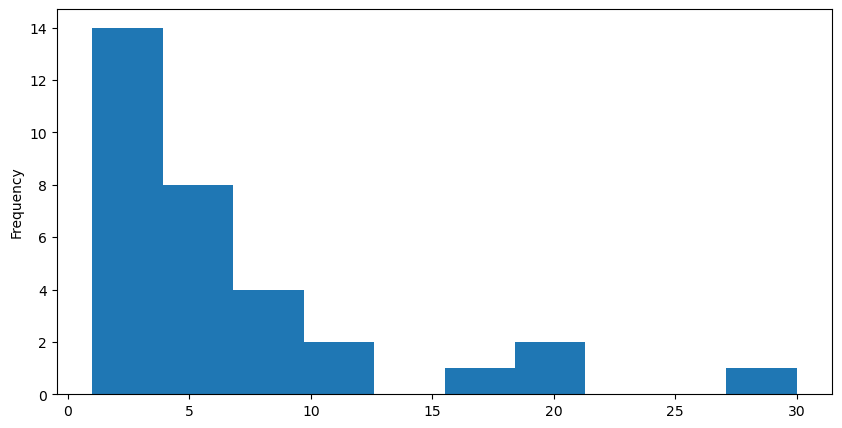

In [83]:
plt.figure(figsize=(10,5))
insta["Influence Score"].value_counts().plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

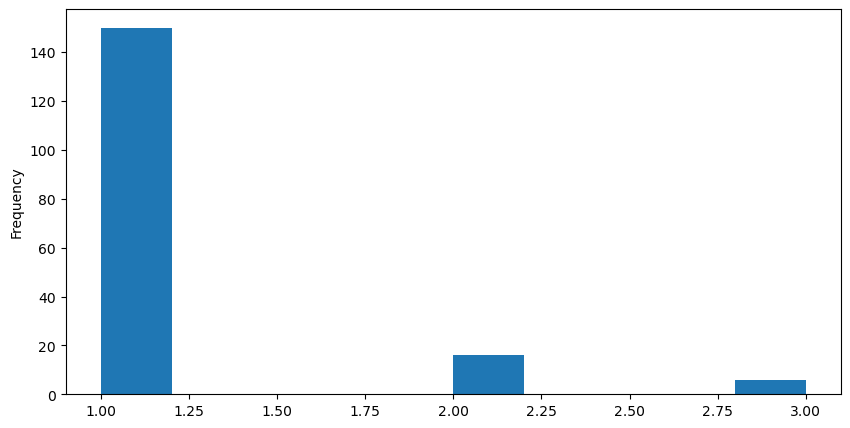

In [84]:
plt.figure(figsize=(10,5))
instagram_data.groupby("Followers").size().plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

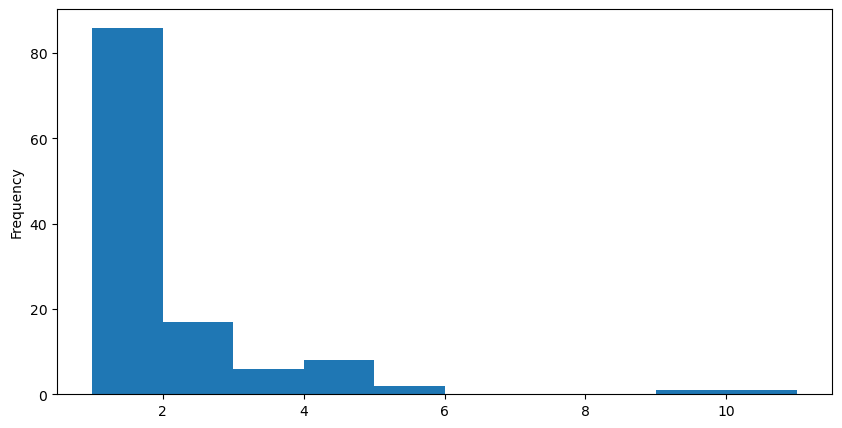

In [85]:
plt.figure(figsize=(10,5))
instagram_data.groupby("Posts").size().plot(kind="hist")

# 3. Which country houses the highest number of Instagram Influencers? Please show thecount of Instagram influencers in different countries using barchart.

<AxesSubplot:>

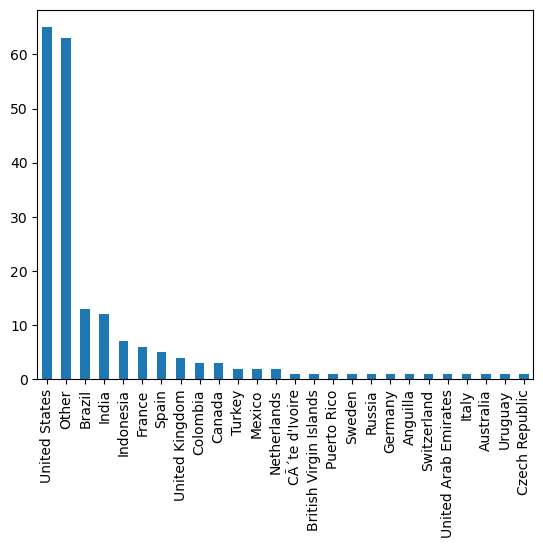

In [86]:
country=insta["Country"].value_counts()

country.plot(kind="bar")

## Top 10 instagram influencer are from.....

In [87]:
country.head(10)

United States     65
Other             63
Brazil            13
India             12
Indonesia          7
France             6
Spain              5
United Kingdom     4
Colombia           3
Canada             3
Name: Country, dtype: int64

# 4. Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes


In [88]:
insta.sort_values(["Followers","Avg. Likes","Total Likes"],ascending=False)["Channel Info"].head(10)

0          Cristiano
1        Kyliejenner
2           Leomessi
3        Selenagomez
4            Therock
5       Arianagrande
6      Kimkardashian
7            Beyonce
8    Khloekardashian
9       Justinbieber
Name: Channel Info, dtype: object

# 5. Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Scor

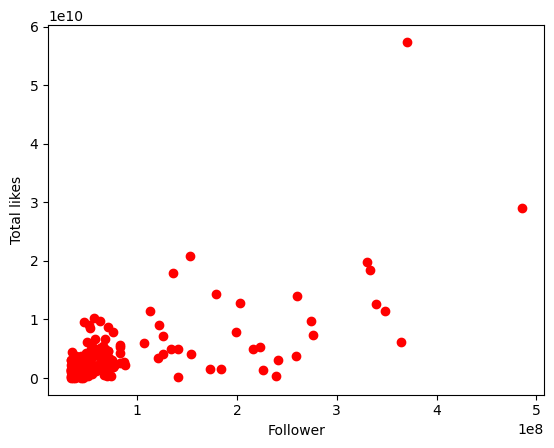

In [89]:
x=insta["Followers"]
y=insta["Total Likes"]
plt.scatter(x,y,c="red")
plt.xlabel("Follower")
plt.ylabel("Total likes")
plt.show()

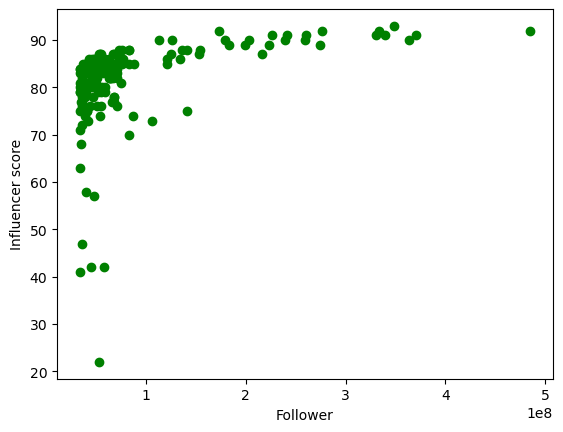

In [90]:
x=insta["Followers"]
y=insta["Influence Score"]
plt.scatter(x,y,c="green")
plt.xlabel("Follower")
plt.ylabel("Influencer score")
plt.show()

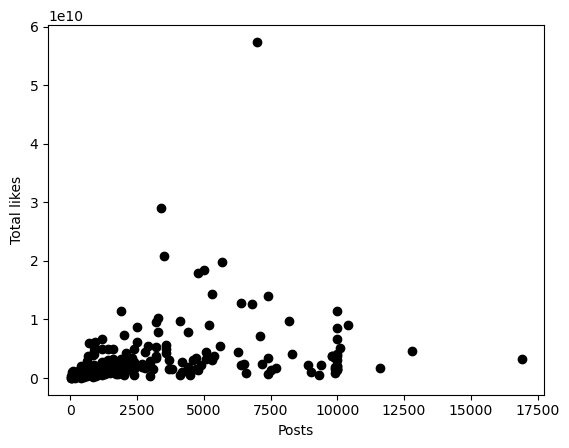

In [91]:
x=insta["Posts"]
y=insta["Total Likes"]
plt.scatter(x,y,c="black")
plt.xlabel("Posts")
plt.ylabel("Total likes")
plt.show()

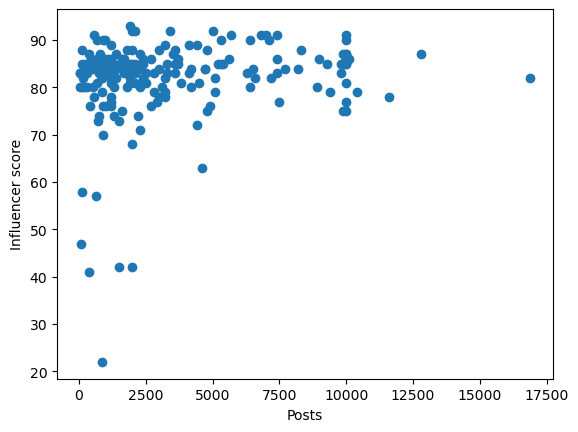

In [92]:
x=insta["Posts"]
y=insta["Influence Score"]
plt.scatter(x,y)
plt.xlabel("Posts")
plt.ylabel("Influencer score")
plt.show()

# Conclusion

# The instagram influencer are from different country and the rank are mostly based on the follower and the content they provide